# Credit card fraud dataset

I am using this [dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data), because besides TSAD applicability, it has many features and would be an interesting showcase for a future logistic regression implementation.

From Kaggle: The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

We will check out the stats and percentages they brought up in this description.

In [32]:
! pip install kagglehub pandas matplotlib numpy scikit-learn

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import kagglehub
from kagglehub import KaggleDatasetAdapter

print("All imports successful!")

All imports successful!


## 1. Inspecting the dataset

Here we use common pandas commands to get a feel for our dataset. First we can inspect the shape to see there actually is 284,807 transactions.

In [34]:
file_path = "creditcard.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.shape

Using Colab cache for faster access to the 'creditcardfraud' dataset.


(284807, 31)

In [35]:
print("First 5 records:")
print(df.head())

First 5 records:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26    

### 1a. The data looks wild

We can see that there are only 3 features that have meaningful names: `Time`, `Amount`, and `Class`. The rest are just variables 1-28. This is done on purpose for confidentiality using something called a **PCA Transformation**, it's beyond my understanding but basically the original data was transformed in a way that kept its statistical meaningfulness.

Let's inspect the detected anomalies (credit card fraud) where `Class == 1`.

In [36]:
print(df[df['Class'] == 1].head())

        Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

            V7        V8        V9  ...       V21       V22       V23  \
541  -2.537387  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211   
623   0.325574 -0.067794 -0.270953  ...  0.661696  0.435477  1.375966   
4920  0.562320 -0.399147 -0.238253  ... -0.294166 -0.932391  0.172726   
6108 -3.496197 -0.248778 -0.247768  ...  0.573574  0.176968 -0.436207   
6329  1.713445 -0.496358 -1.282858  ... -0.379068 -0.704181 -0.656805   

           V24       V25       V26       V27       V28  Amount  Class  
541   0.320198  0.044519  0.1778

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [38]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

### 1b. Exploratory data analysis (EDA)

We have taken a look at how our dataset looks in raw numbers. Despite the V# features not being very meaningful currently, we see that some expected behavior is happening in each column.

For example the min of `Time` is 0 and the max is the end of the sample 172192. On Kaggle they mentioned this was a 2-day sample, which about aligns with the amount of seconds in two days. (48 hours/min * 60 mins/hour * 60 seconds/min) = 172800 seconds

Another interesting example is how the max of amount is $25,691. One big purchase.

Let's look at some plots.

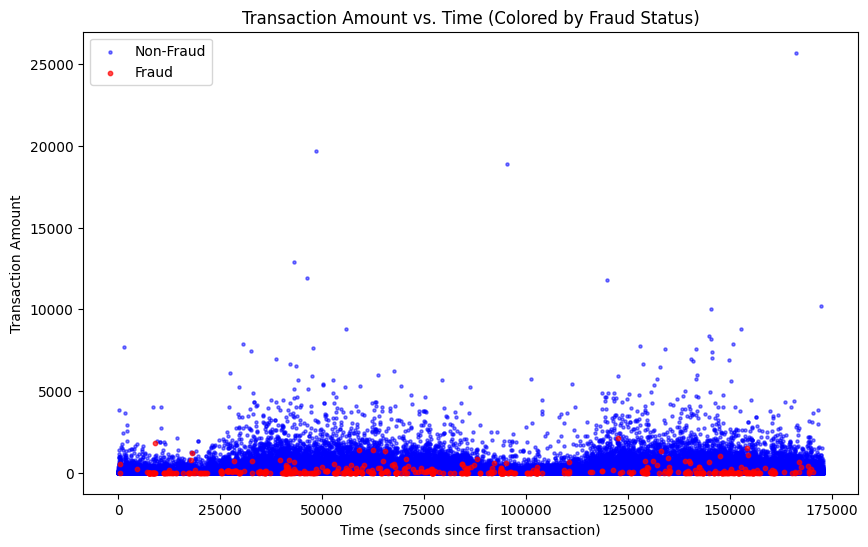

In [43]:
non_fraud = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

# create the scatter plot
plt.figure(figsize=(10, 6)) # Make the plot a bit larger

# plot non-fraud transactions in blue
plt.scatter(non_fraud['Time'], non_fraud['Amount'], alpha=0.5, label='Non-Fraud', color='blue', s=5) # s=5 makes points smaller

# make fraud points slightly larger
plt.scatter(fraud['Time'], fraud['Amount'], alpha=0.7, label='Fraud', color='red', s=10)

# add labels and title
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Transaction Amount")
plt.title("Transaction Amount vs. Time (Colored by Fraud Status)")
plt.legend()
plt.show()

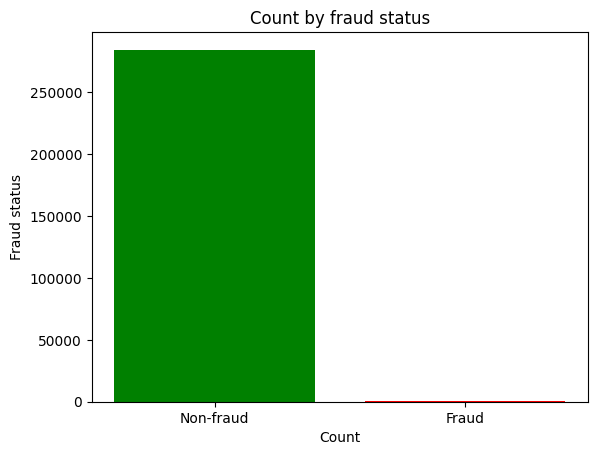

In [60]:
class_counts = df['Class'].value_counts()

plt.bar(['Non-fraud', 'Fraud'], class_counts.values, color=['green', 'red'])

plt.xlabel("Count")
plt.ylabel("Fraud status")
plt.title("Count by fraud status")
plt.show()

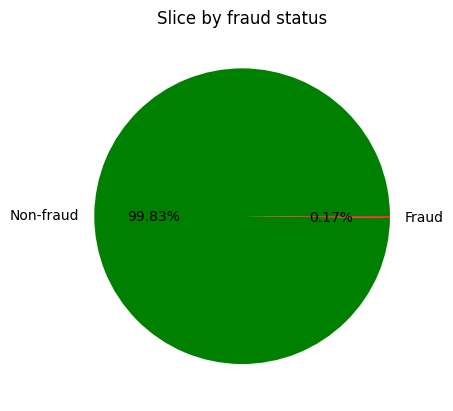

In [59]:
plt.pie(class_counts, labels=['Non-fraud', 'Fraud'], colors=['green', 'red'], autopct="%1.2f%%")
plt.title("Slice by fraud status")

plt.show()

## 2. Solving the imbalance

Here we can now clearly see there is a *class imbalance*. If we were to train the model on this dataset, it would not have enough cases of fraud to properly classify a fraud.

One common way to deal with this issue is a data augmentation technique called *oversampling*. This technique aims to increase our minority class samples through replication of existing data points or synthetic generation of new ones.

I won't implement this yet but in the future I will when I implement logistic regression along with it.